# Matplotlib example

In lecture 1 we've seen the basics of plotting with matplotlib and discussed the two main plotting APIs. In this lecture we walk through creating a more complex plot step by step in a regular workflow.

## Why bother
Matplotlib can be very finnicky and confusing, mainly because there are many ways to achieve the same result. By walking through the process of creating a more complex plot step by step we can give more insights in how to approach complex plotting tasks

# Iris dataset
In this lecture we use the iris dataset

> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]
> 
> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.
[From Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris_ds = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris_ds.data, iris_ds.target],
                     columns= iris_ds.feature_names + ['class'])

map_dict = {i:iris_ds.target_names[i] for i in range(len(iris_ds.target_names))}
iris['class'] = iris['class'].map(map_dict)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


I like to start my plotting from pandas. The reasons are that is a quick way to prototype visualizations, and that I typically already use pandas in the rest of my data processing and analyses.



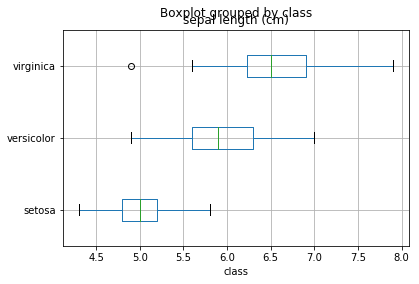

In [2]:
iris.boxplot(by='class',column='sepal length (cm)', vert=False)

That's not a very pretty plot, but it's a starting point. One of the easiest ways we can improve how our plot looks is by changing matplotlibs style. You can see what styles are available by calling `plt.style.available` 

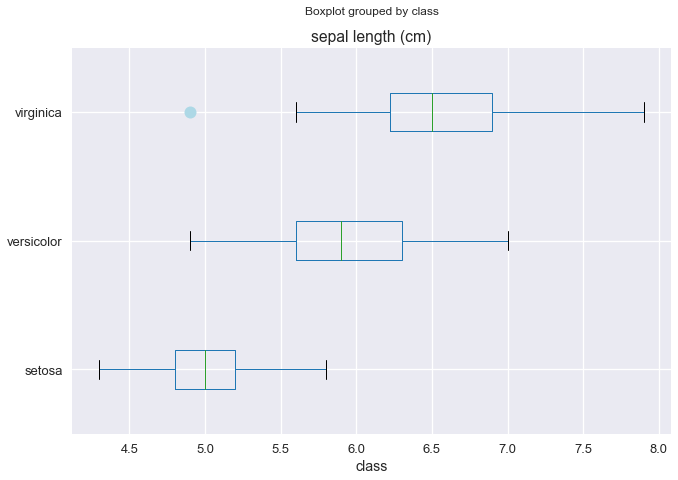

In [7]:
plt.style.use('seaborn-dark')
iris.boxplot(by='class',column='sepal length (cm)', vert=False, 
             flierprops={'marker':'o', 'markerfacecolor':'lightblue', 'markersize':12})

Much better! Note that we did lose the outliers in this style, so we had to add those back in manually.
The next step is customizing the plot. Simple modifications like adding titles and labels are easy with the built-in pandas functions, but you often find yourself needing something that isn't covered by pandas utility functions. Therefore, it's typically better to get in the habit of using the object-oriented api we've seen to make our changes:


Text(0.5,0.98,'Iris class analysis')

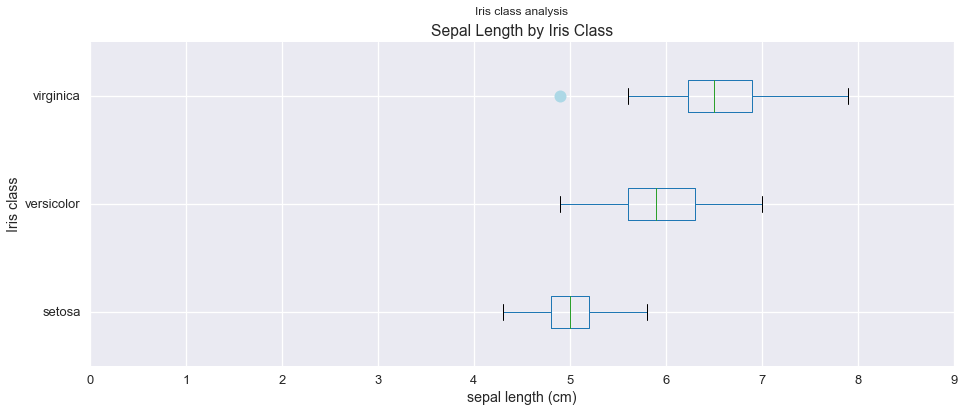

In [9]:
plt.style.use('seaborn-talk')
plt.rcParams['boxplot.flierprops.color'] = 'k'
plt.rcParams['boxplot.flierprops.marker'] = 'o'
plt.rcParams['boxplot.flierprops.markersize'] = 12
plt.rcParams['boxplot.flierprops.markerfacecolor'] = 'lightblue'

fig, ax = plt.subplots(figsize=(15, 6))

iris.boxplot(by='class',column='sepal length (cm)', vert=False, ax=ax)
ax.set_xlim([0, 9])
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('Iris class');
ax.set_title('Sepal Length by Iris Class')

fig.suptitle('Iris class analysis')


note the `ax=ax` argument to the boxplot function, indicating that we want to plot the pandas plot on the specified matplotlib axes.

Text(0.5,0.98,'Iris class analysis')

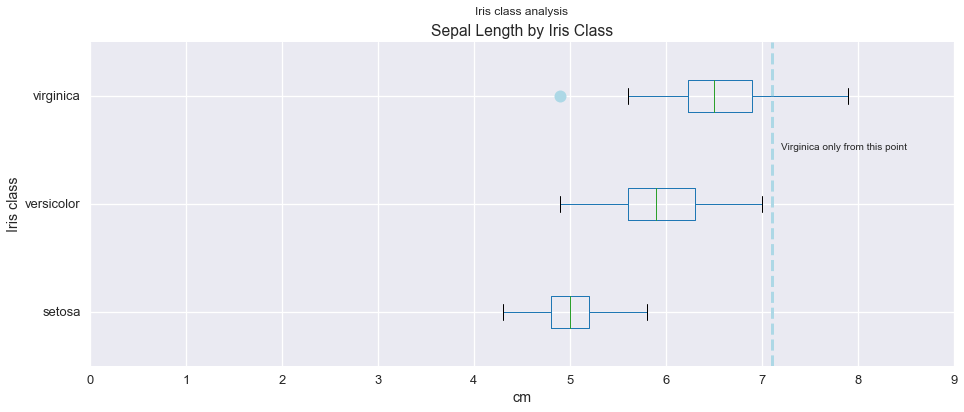

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))

iris.boxplot(by='class',column='sepal length (cm)', vert=False, ax=ax)
ax.set_xlim([0, 9])
ax.set_xlabel('cm')
ax.set_ylabel('Iris class');
ax.set_title('Sepal Length by Iris Class')

ax.axvline(x=7.1, color='lightblue', label='virginica_only', linestyle='--', linewidth=3)
ax.text(7.2, 2.5, 'Virginica only from this point')
fig.suptitle('Iris class analysis')

Text(0.5,0.98,'Iris sepal statistics by class')

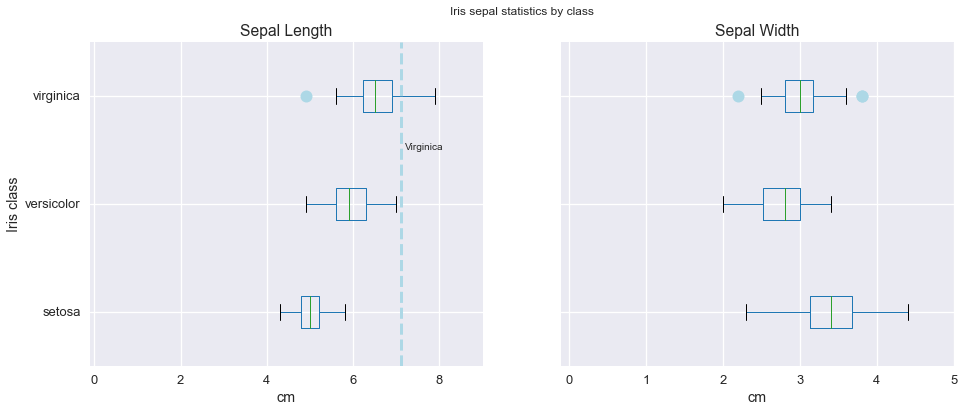

In [11]:
fig, (ax_left, ax_right) = plt.subplots(figsize=(15, 6), ncols=2, sharey=True)

iris.boxplot(by='class',column='sepal length (cm)', vert=False, ax=ax_left)
ax_left.set_xlim([-0.1, 9])
ax_left.set_xlabel('cm')
ax_left.set_ylabel('Iris class');
ax_left.set_title('Sepal Length')

ax_left.axvline(x=7.1, color='lightblue', label='virginica_only', linestyle='--', linewidth=3)
ax_left.text(7.2, 2.5, 'Virginica')


iris.boxplot(by='class',column='sepal width (cm)', vert=False, ax=ax_right)
ax_right.set_xlim([-0.1, 5])
ax_right.set_title('Sepal Width')
ax_right.set_xlabel('cm')
fig.suptitle('Iris sepal statistics by class')